In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import collections

In [2]:
ipl_df=pd.read_csv('matches.csv')
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [4]:
ipl_df.shape

(756, 18)

In [5]:
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Data Cleaning

In [6]:
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [7]:
ipl_df["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [8]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

Data columns name change required for some teams

In [10]:
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

In [11]:
deliveries_df.batting_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
deliveries_df.bowling_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)

In [12]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [13]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [14]:
ipl_df.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [15]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [16]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

# Cleaning empty records

In [17]:
ipl_df.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [18]:
ipl_df.isna().sum().sum()

15

In [19]:
NaN_df = ipl_df[ipl_df.isna().any(axis=1)]

In [20]:
ipl_df.loc[[461,462,466,468,469,474,476],'city'] = "Dubai"

In [21]:
ipl_df.fillna({"winner":"Draw/Cancelled","player_of_match":"Draw/Cancelled"},inplace=True)

In [22]:
ipl_df.isna().sum().sum()

0

In [23]:
ipl_df.id.count()

756

In [24]:
regular_matches = ipl_df[ipl_df.result == 'tie'].count()

regular_matches.result

9

In [25]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [26]:
cities = ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


# Most number of matches played at each stadium

In [27]:
cities.rename(columns={'id':'matches'},inplace=True)
cities = cities.sort_values('matches',ascending=False).reset_index()
cities.index=np.arange(1,len(cities)+1)
cities.style.background_gradient()

,city,matches
1,Mumbai,101
2,Bengaluru,80
3,Kolkata,77
4,Delhi,74
5,Hyderabad,64
6,Chennai,57
7,Jaipur,47
8,Chandigarh,46
9,Pune,38
10,Durban,15


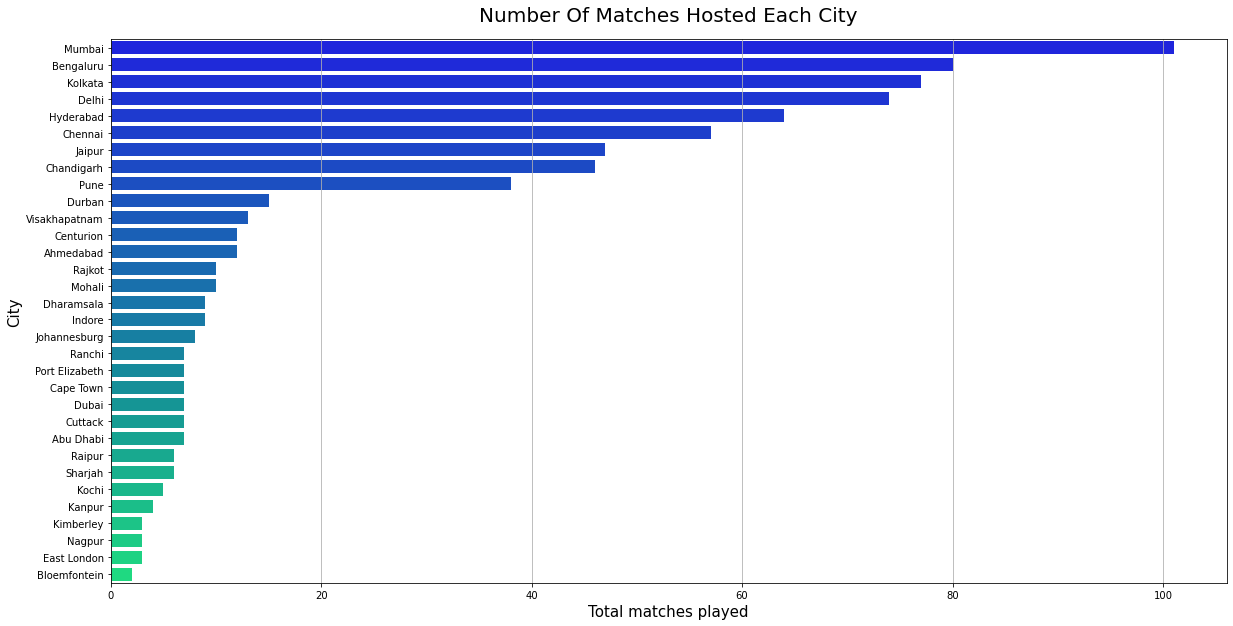

In [28]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Number Of Matches Hosted Each City',pad=18, fontsize=20)
sns.barplot(x='matches',y='city',data=cities,palette='winter')
plt.xlabel("Total matches played",fontsize=15)
plt.ylabel("City",fontsize=15)
plt.show()

In [29]:
season_df = ipl_df.groupby('season')[['id']].count()
season_df

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


In [30]:
season_df.rename(columns = {'id':'number of matches played','season':'season'},inplace=True)
season_df.style.background_gradient()

,number of matches played
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


Text(0.5, 1.0, 'Total matches played in each season')

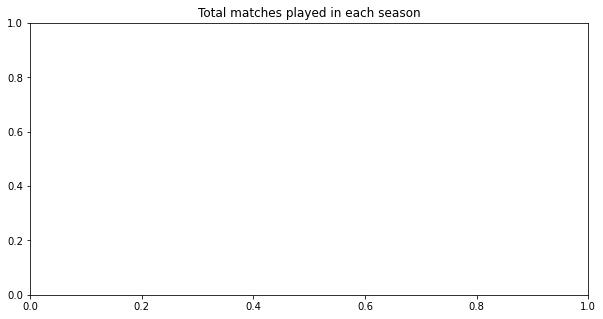

In [31]:
plt.figure(figsize=(10,5))
plt.title("Total matches played in each season")

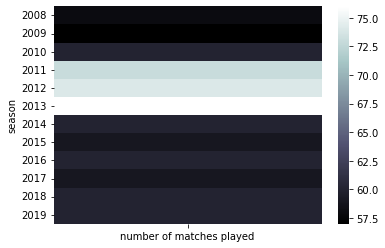

In [32]:
sns.heatmap(season_df,cmap='bone');

# Total matches won by each team

In [33]:
winner_df = ipl_df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False).reset_index()
winner_df=winner_df[:][winner_df['winner']!='Draw/Cancelled']

In [34]:
winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner_df.index=np.arange(1,len(winner_df)+1)
winner_df.style.background_gradient()

,Teams,wins
1,Mumbai Indians,109
2,Chennai Super Kings,100
3,Kolkata Knight Riders,92
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
6,Delhi Capitals,77
7,Rajasthan Royals,75
8,Sunrisers Hyderabad,58
9,Deccan Chargers,29
10,Rising Pune Supergiant,27


<AxesSubplot:title={'center':'Number of Matches Won By Each Team'}, xlabel='wins', ylabel='Teams'>

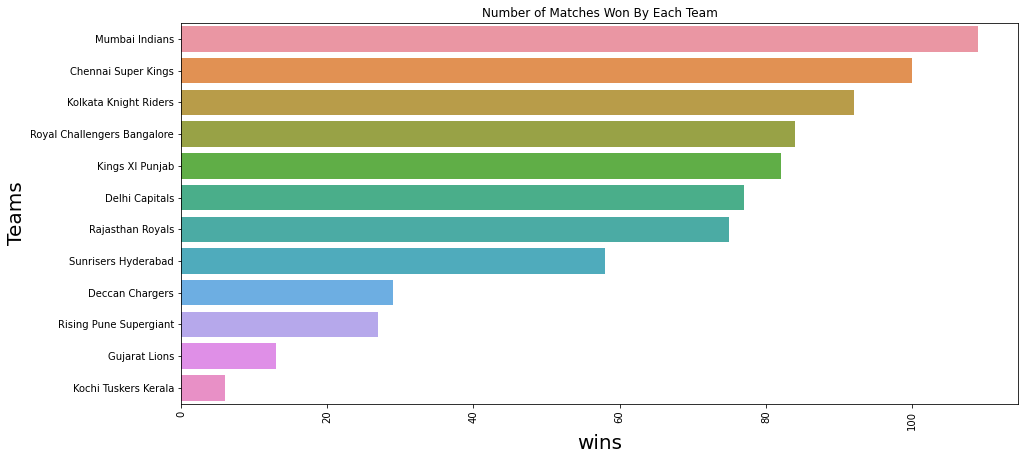

In [35]:
plt.figure(figsize=(15,7))
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Wins',fontsize=20)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
plt.title('Number of Matches Won By Each Team')
sns.barplot(y=winner_df.Teams, x=winner_df.wins)

# Insights

Preferred decision of choosing play

In [36]:
ipl_df.toss_decision.unique()
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()

decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decision_df


,Decision,Total
0,bat,293
1,field,463


['bat', 'field'] 0    293
1    463
Name: Total, dtype: int64


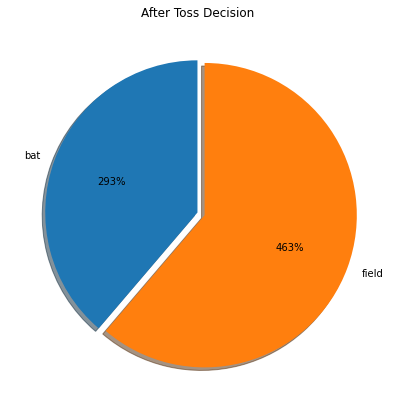

In [37]:
plt.figure(figsize=(7,7))
plt.title("After Toss Decision")
print(decision_df.Decision.values.tolist(), decision_df.Total)
explode = (0, 0.05)
total = sum(decision_df.Total.values)
plt.pie(decision_df.Total.values, labels = decision_df.Decision.values, explode = explode, autopct=lambda p: '{:.0f}%'.format(p * total / 100),shadow=True, startangle=90)

plt.show()

Which decision is the most successfull

In [38]:
field_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'field'), ['id', 'winner','toss_decision']]
field_df.id.count()

259

In [39]:
bat_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['id', 'winner','toss_decision']]
bat_df.id.count()

134

In [40]:
dataframes = [bat_df, field_df]
result_df = pd.concat(dataframes)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
result_df.style.hide_index()

/var/folders/x5/p75fnhyd5ssg4jfnvc3fk0fc0000gn/T/ipykernel_27161/2070632440.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  result_df.style.hide_index()


Decision,Total
bat,134
field,259


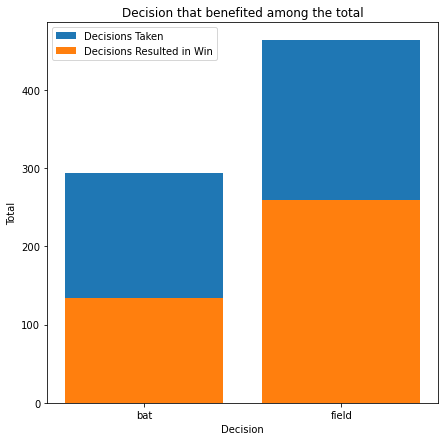

In [41]:
plt.figure(figsize=(7,7))
plt.title("Decision that benefited among the total")
plt.xlabel('Decision')
plt.ylabel('Total')
plt.bar(decision_df.Decision, decision_df.Total);
plt.bar(result_df.Decision, result_df.Total);
plt.legend(['Decisions Taken','Decisions Resulted in Win']);

Highest number of matches hosted in each city

In [42]:
venue_df=ipl_df.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id',ascending=False).reset_index()
venue_df.index=np.arange(1,len(venue_df)+1)
venue_df.rename(columns={'id':'Total matches played','venue':'Venue'},inplace=True)
venue_df.style.background_gradient()

,Venue,Total matches played
1,Eden Gardens,77
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,73
4,Feroz Shah Kotla,67
5,"Rajiv Gandhi International Stadium, Uppal",56
6,"MA Chidambaram Stadium, Chepauk",49
7,Sawai Mansingh Stadium,47
8,"Punjab Cricket Association Stadium, Mohali",35
9,Maharashtra Cricket Association Stadium,21
10,Dr DY Patil Sports Academy,17


<AxesSubplot:title={'center':'Number Of Matches Played In Each City'}, xlabel='Total matches played', ylabel='Venue'>

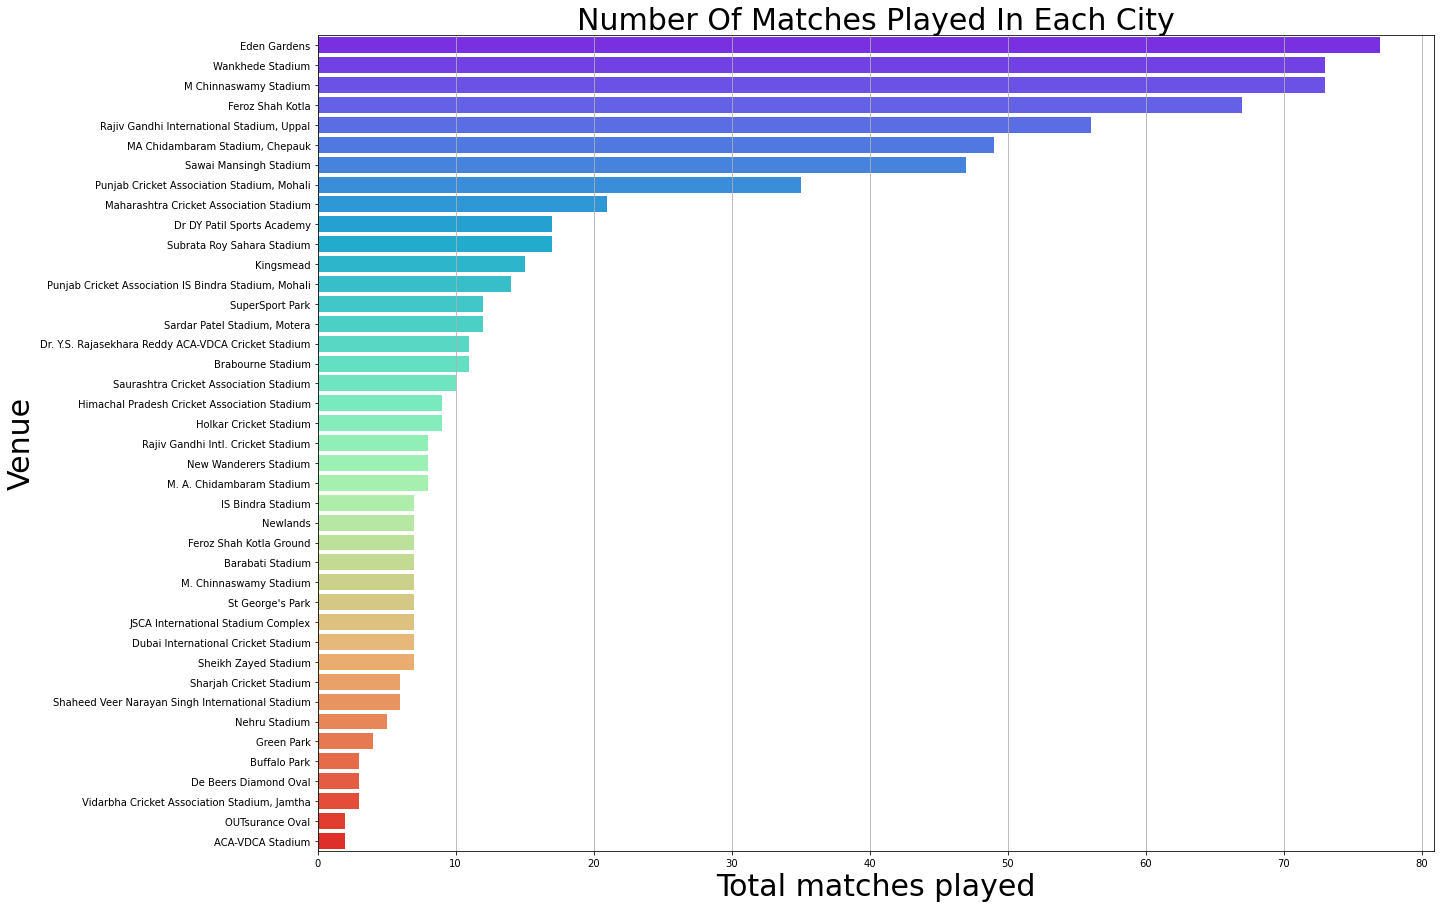

In [43]:
plt.figure(figsize=(20,15))
plt.grid()
plt.xlabel("Total matches played",fontsize=30)
plt.ylabel("Venue",fontsize=30)
plt.title('Number Of Matches Played In Each City',fontsize=30)
sns.barplot(x='Total matches played',y='Venue',data=venue_df,palette='rainbow')

# Most number of Wins by a Team

In [44]:
final_df = ipl_df.groupby('season').tail(1).copy()
final_df=final_df.sort_values('season')
final_df=final_df.reset_index(drop=True)


def highlight_data(x):
    df=x.copy()
    df.loc[:,:]='background-color:white'
    df.winner='background-color:lightgreen'
    return d

In [45]:
final_count_df=final_df.groupby('winner')[['id']].count()
final_count_df.rename(columns={'id':'no of times','winner':'winner'},inplace=True)
final_count_df=final_count_df.reset_index()
final_count_df.style.hide_index().background_gradient()

/var/folders/x5/p75fnhyd5ssg4jfnvc3fk0fc0000gn/T/ipykernel_27161/66434154.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  final_count_df.style.hide_index().background_gradient()


winner,no of times
Chennai Super Kings,3
Deccan Chargers,1
Kolkata Knight Riders,2
Mumbai Indians,4
Rajasthan Royals,1
Sunrisers Hyderabad,1


<BarContainer object of 6 artists>

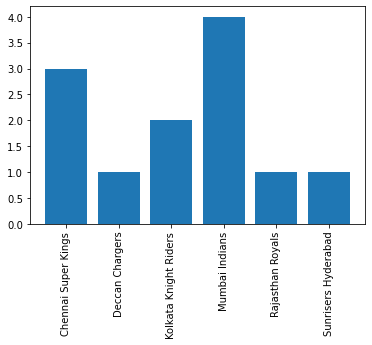

In [46]:
plt.xticks(rotation=90)
plt.bar(final_count_df.winner,final_count_df['no of times'])

Text(0.5, 1.0, 'Number of Trophies won by each Team')

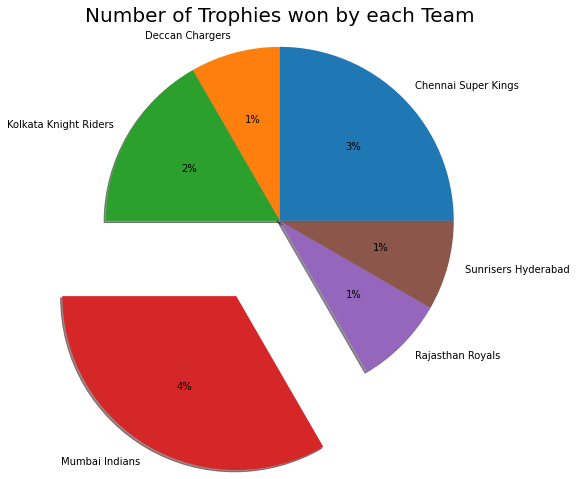

In [47]:
def func(pct, allvalues):
    absolute = int(pct / 100*np.sum(allvalues))
    return "{:d}".format(absolute)
total = sum(list(final_count_df['no of times']))
plt.pie(list(final_count_df['no of times']),labels=list(final_count_df.winner),shadow = True, autopct=lambda p: '{:.0f}%'.format(p * total / 100),explode=[0,0,0,1,0,0],radius=2)
plt.title('Number of Trophies won by each Team', pad=90, fontsize=20)


# Players with Man of the Match

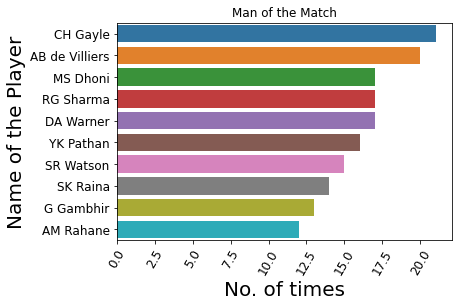

In [48]:
pom_df=ipl_df.groupby('player_of_match')[['id']].count()
pom_df = pom_df.sort_values('id',ascending=False).reset_index()
pom_df.rename(columns={'id':'No. of times','player_of_the_match':'Player_of_the_match'},inplace=True)

pom_df = pom_df.head(10)
pom_df.index=np.arange(1,len(pom_df)+1)
sns.barplot(y=pom_df['player_of_match'],x=pom_df['No. of times']);
plt.title('Man of the Match')
plt.tick_params(labelsize=12)
plt.xticks(rotation=60)
plt.ylabel("Name of the Player", fontsize=20)
plt.xlabel("No. of times", fontsize=20);

# Which Team Played most finals

In [49]:
df1=pd.DataFrame({'team_name':final_df.team1,'id':final_df.id})
df2=pd.DataFrame({'team_name':final_df.team2,'id':final_df.id})
team_final=pd.concat([df1,df2],ignore_index=True)
team_final=team_final.groupby('team_name')[['id']].count()
team_final.rename(columns={'id':'no. of times','team_name':'team_name'},inplace=True)
team_final=team_final.sort_values('no. of times',ascending=False).reset_index()
team_final=team_final.head()

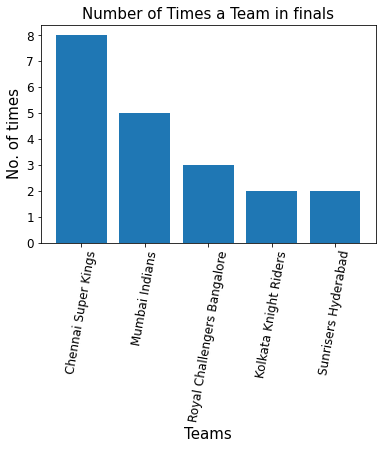

In [50]:
plt.bar(team_final['team_name'],team_final['no. of times'])
plt.title('Number of Times a Team in finals',fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=80)
plt.xlabel("Teams",size=15)
plt.ylabel("No. of times",size=15)
plt.show()

/Users/harshavaliveti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Runs')

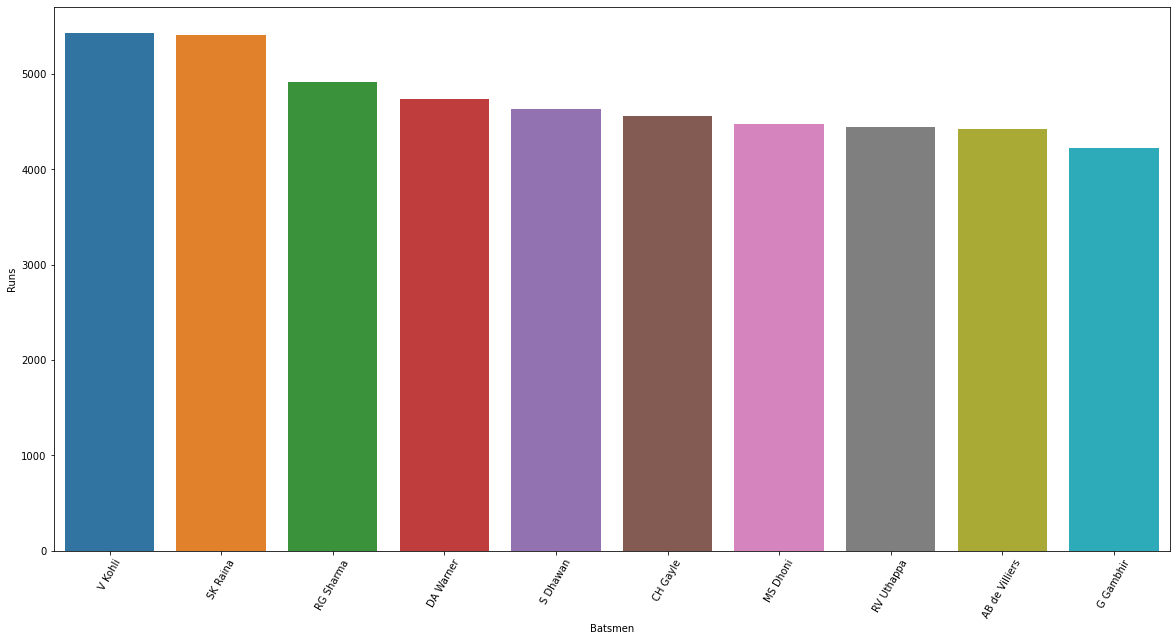

In [51]:
batting_tot=deliveries_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
plt.figure(figsize = (20,10))
sns.barplot(top_batsmen['batsman'], top_batsmen['Runs'])
plt.xticks(rotation=60)
plt.xlabel('Batsmen')
plt.ylabel('Runs')

Top 10 wicket takers

/Users/harshavaliveti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SL Malinga'),
  Text(1, 0, 'A Mishra'),
  Text(2, 0, 'Harbhajan Singh'),
  Text(3, 0, 'PP Chawla'),
  Text(4, 0, 'DJ Bravo'),
  Text(5, 0, 'B Kumar'),
  Text(6, 0, 'R Ashwin'),
  Text(7, 0, 'SP Narine'),
  Text(8, 0, 'UT Yadav'),
  Text(9, 0, 'RA Jadeja')])

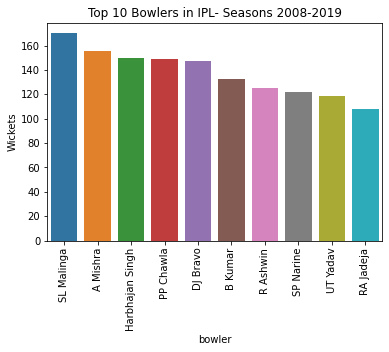

In [52]:
bowling_wickets=deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
sns.barplot(top_bowlers['bowler'], top_bowlers['Wickets'])
plt.title('Top 10 Bowlers in IPL- Seasons 2008-2019')
plt.xticks(rotation=90)

Top 10 Wicket Keepers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

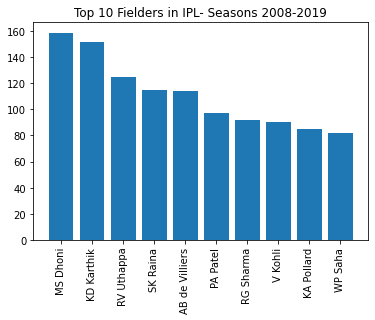

In [53]:
fielder_list=deliveries_df.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
plt.bar(top_fielders['fielder'], top_fielders['Dismissals'])
plt.title('Top 10 Fielders in IPL- Seasons 2008-2019')
plt.xticks(rotation=90)

All rounder performance

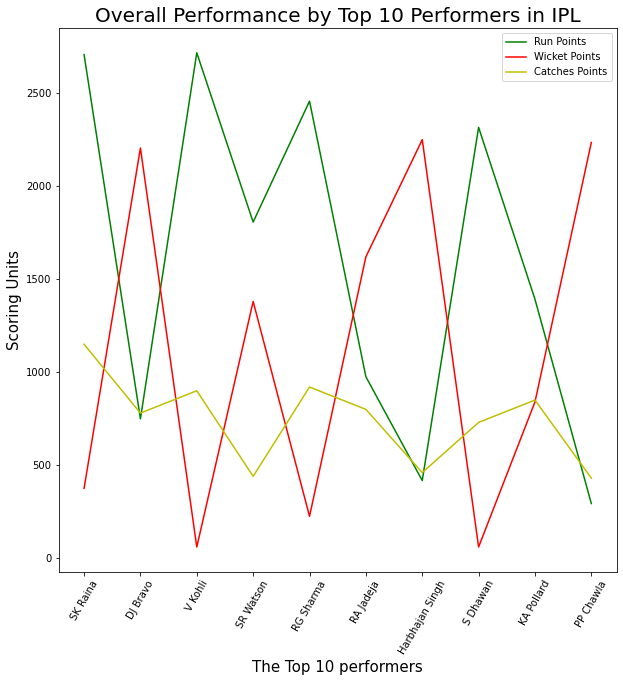

In [54]:
batting_factor=0.5
bowling_factor=15.0
fielding_factor=10.0
all_rounding_1=pd.merge(batting_sorted,bowling_top,left_on='batsman',right_on='bowler',how='inner')
all_rounding_2=pd.merge(all_rounding_1,fielder_list_max,left_on='batsman',right_on='fielder',how='left')
all_rounding_performance=all_rounding_2.groupby(['batsman','Runs','Wickets','Dismissals']).apply(lambda x:(((x['Runs'])*batting_factor)+((x['Wickets'])*bowling_factor)+((x['Dismissals'])*fielding_factor))).reset_index(name='Overall Score')
best_all_round_performance=all_rounding_performance.sort_values(by='Overall Score',ascending=False)
best_overall=best_all_round_performance.loc[:,['batsman','Runs','Wickets','Dismissals',]][0:10]
plt.figure(figsize=(10,10))
plt.plot(best_overall['batsman'],best_overall['Runs']*batting_factor,'g')
plt.plot(best_overall['batsman'],best_overall['Wickets']*bowling_factor,'r')
plt.plot(best_overall['batsman'],best_overall['Dismissals']*fielding_factor,'y')
plt.xlabel('The Top 10 performers',size=15)
plt.ylabel('Scoring Units',size=15)
plt.xticks(rotation=60)
plt.title('Overall Performance by Top 10 Performers in IPL',size=20)
plt.legend(['Run Points','Wicket Points','Catches Points'])

Team wise first innings vs second innings

Text(0.5, 1.0, 'Team wise Batting Average as Innings Wise')

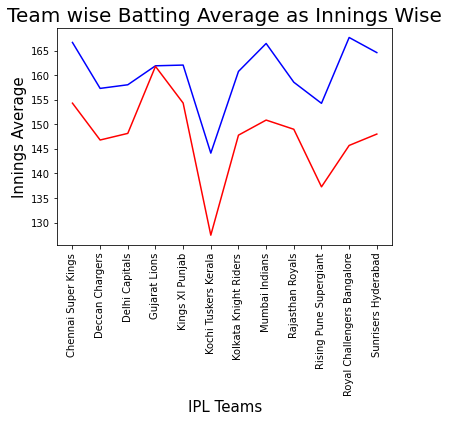

In [55]:
first_innins_run=deliveries_df[deliveries_df['inning']==1]
team_innings_run=first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')
second_innins_run=deliveries_df[deliveries_df['inning']==2]
team_innings_run=second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average as Innings Wise',size=20)

Teams with their Innings wise 

Text(0.5, 1.0, 'Team wise Bowling Average as Innings wise')

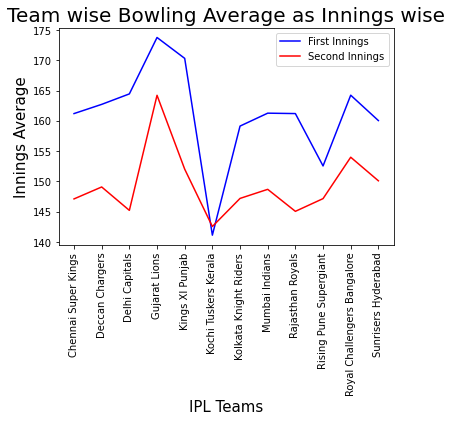

In [56]:
first_innins_score=deliveries_df[deliveries_df['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=deliveries_df[deliveries_df['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average as Innings wise',size=20)

# Each Team Win & Loss in their Plays

[100, 29, 77, 82, 13, 6, 109, 75, 0, 84, 58] [64, 46, 100, 94, 17, 8, 78, 72, 0, 96, 50]


Text(0, 0.5, 'Number of Matches they win & loss %')

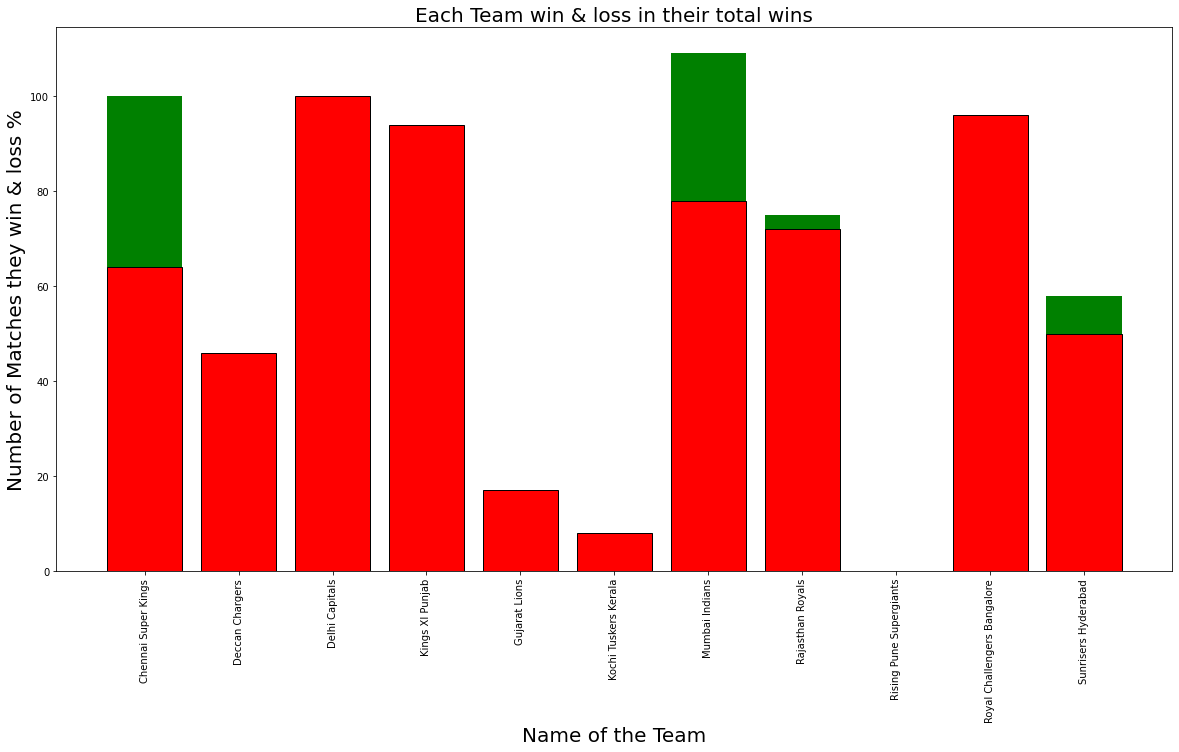

In [57]:
first_run = ipl_df.loc[:, ['team1', 'team2', 'winner']]
first_run.describe()
teams = ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Kings XI Punjab'
        , 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Mumbai Indians', 'Rajasthan Royals', 'Rising Pune Supergiants'
        ,'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

win_team = collections.defaultdict(int)
loss_team = collections.defaultdict(int)


for team in teams:
    for i in first_run.index:
        if first_run['team1'][i] == team:
            if first_run['winner'][i] == team:
                win_team[team] += 1
            else:
                loss_team[team] += 1
        elif first_run['team2'][i] == team:
            if first_run['winner'][i] == team:
                win_team[team] += 1
            else:
                loss_team[team] += 1
wins = []
loss = []
for t in teams:
    wins.append(win_team[t])
    loss.append(loss_team[t])             
print(wins, loss)
plt.figure(figsize=(20,10))
plt.title('Each Team win & loss in their total wins', fontsize=20)
plt.bar(teams, wins,  color= 'green')
plt.bar(teams, loss,color='red' ,edgecolor='black')
plt.xlabel('Name of the Team', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Number of Matches they win & loss %', fontsize=20)